(60000, 28, 28)
(10000, 28, 28)


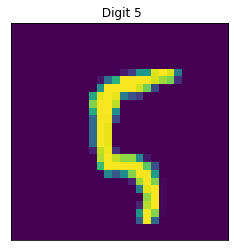

0 255


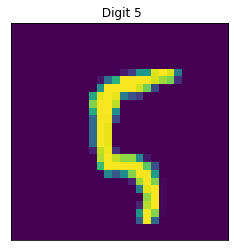

0.0 1.0


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as k
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_rows, img_col = 28, 28
num_classes = 10

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape) 
print(test_images.shape) 

train_images = train_images.reshape(train_images.shape[0], img_rows, img_col, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_col, 1)
input_shape = (img_rows, img_col, 1) 

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100)

train_images = train_images.astype('float32') 
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100)

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

epochs = 15
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

# added this
model.add(Dropout(rate = 0.3))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Dropout(rate = 0.4))
model.add(Conv2D(256, (3, 3), activation = 'relu'))

model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model.fit(train_images, train_labels, batch_size = 64, epochs = epochs, validation_data = (test_images, test_labels), shuffle = True)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 0)
print('\nTest accuracy:', test_acc)

model.save('my_model.h5')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 dropout_3 (Dropout)         (None, 9, 9, 32)          0         
                                                      